In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [3]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

In [4]:
books = books.set_axis(["ISBN","Title","Author","Year","Publisher","Image_URL_S","Image_URL_M","Image_URL_L"], axis = "columns")
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books["Image_URL_M"][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Title        271360 non-null  object
 2   Author       271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image_URL_S  271360 non-null  object
 6   Image_URL_M  271360 non-null  object
 7   Image_URL_L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books["Title"].nunique()

242135

In [8]:
books["Title"].value_counts()

Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                      

In [9]:
books["Year"].value_counts()

Year
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64

In [10]:
books.Publisher.value_counts()[:15]

Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Penguin USA                 2717
Harpercollins               2525
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2045
Name: count, dtype: int64

In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings["Book-Rating"].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [13]:
ratings.groupby(by = "User-ID").count().sort_values(by = "ISBN", ascending = False).head(10)

,ISBN,Book-Rating
User-ID,,
11676,13602,13602
198711,7550,7550
153662,6109,6109
98391,5891,5891
35859,5850,5850
212898,4785,4785
278418,4533,4533
76352,3367,3367
110973,3100,3100


In [14]:
ratings.groupby(by = "User-ID").sum().sort_values(by = "Book-Rating", ascending = False).head(10)

,ISBN,Book-Rating
User-ID,,
11676,"9022906116\0432534220\""""\2842053052\""""0 7336 ...",62092
98391,006000144500600014530060001461006000147X006000...,51418
153662,0002241447000647036X00204349010020973403002860...,17025
23902,0001046438000104687X00010472130001047973000104...,10511
189835,0001053736000105374400021819240006279945002043...,9734
76499,002019881700202098510024096903002411510X002420...,9255
56399,0001845039000458801000061700560006176089000674...,8784
235105,000250653X00044905090020199600002026478X002078...,8195
171118,0000913154000215785300021674250002255081000225...,7619


In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [18]:
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Top Recommendations

In [19]:
high_rated = ratings.groupby("ISBN").count().sort_values("Book-Rating",ascending = False).reset_index().drop(["User-ID"],axis = 1)
high_rated.rename(columns = {'Book-Rating': 'num_of_ratings'},inplace = True)
ratings["Book-Rating"] = pd.to_numeric(ratings["Book-Rating"],errors = "coerce")
avg_ratings = ratings.groupby("ISBN").mean().sort_values("Book-Rating",ascending = True).reset_index().drop(["User-ID"],axis = 1)
avg_ratings.rename(columns = {'Book-Rating': 'avg_rating'},inplace = True)

In [20]:
popular_books = books.merge(high_rated,on = "ISBN").merge(avg_ratings, on = "ISBN").drop(["Image_URL_M","Image_URL_L"],axis = 1)
popular_books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,num_of_ratings,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,14,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,3,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,11,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,1,0.000000


In [21]:
popular_books["weighted_rating"] = (popular_books["num_of_ratings"] * popular_books["avg_rating"])/sum(popular_books["num_of_ratings"])

In [22]:
top_100_books = popular_books.sort_values(by= "weighted_rating",ascending = False)[:101].reset_index()
top_100_books.head(10)

,index,ISBN,Title,Author,Year,Publisher,Image_URL_S,num_of_ratings,avg_rating,weighted_rating
0,408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,1295,4.468726,0.005612
1,748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,883,4.652322,0.003984
2,522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,723,4.334716,0.003039
3,2139,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,571,4.900175,0.002714
4,356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,615,4.219512,0.002517
5,26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,2502,1.019584,0.002474
6,1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,732,3.448087,0.002448
7,706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,585,4.105983,0.002329
8,231,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,526,4.218631,0.002152
9,118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,586,3.718430,0.002113


### Similarity Recommendation (Content-Based Filtering)

In [23]:
similarity_top = books[["ISBN","Title","Author","Publisher","Image_URL_S"]]

In [24]:
similarity_top

,ISBN,Title,Author,Publisher,Image_URL_S
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [25]:
similarity_top = similarity_top.merge(ratings,on = "ISBN")


In [26]:
top_rated_books = similarity_top.groupby("Title").count()["Book-Rating"] > 20
similarity_top = similarity_top[similarity_top["Title"].isin(top_rated_books[top_rated_books].index)]
similarity_top = similarity_top.drop_duplicates(subset = ["Title"], keep = "first")
similarity_top.head(15)

,ISBN,Title,Author,Publisher,Image_URL_S,User-ID,Book-Rating
30,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,8,0
82,1552041778,Jane Doe,R. J. Kaiser,Mira Books,http://images.amazon.com/images/P/1552041778.0...,8,5
83,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,Health Communications,http://images.amazon.com/images/P/1558746218.0...,8,0
98,0440234743,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,277478,0
520,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,Plume,http://images.amazon.com/images/P/0452264464.0...,277711,0
719,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,10,0
769,0971880107,Wild Animus,Rich Shapero,Too Far,http://images.amazon.com/images/P/0971880107.0...,276925,0
3271,0345402871,Airframe,Michael Crichton,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,277965,0
3478,0345417623,Timeline,MICHAEL CRICHTON,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,277965,0
3885,0684823802,OUT OF THE SILENT PLANET,C.S. Lewis,Scribner,http://images.amazon.com/images/P/0684823802.0...,17,0


In [27]:
similarity_top["Features"] = similarity_top["Title"] + " " + similarity_top["Author"] + " " + similarity_top["Publisher"]


In [28]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
import string
def preprocessing(text):
    #removing all numbers
    text = re.sub(r"[^a-zA-Z ]","",str(text))
    #converting everything to lower case
    text = text.lower()
    #remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    #remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    #stemming
    stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    stemmed_words = [stemmer.stem(word) for word in words]  # applying the Snowball stemmer to each word
    text = ' '.join(stemmed_words) 
    return text

[nltk_data] Downloading package stopwords to /home/yashas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yashas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:

similarity_top["Features"] = similarity_top["Features"].apply(preprocessing)

In [30]:
similarity_top = similarity_top.reset_index()
similarity_top["Features"][0]

'kitchen god wife ami tan putnam pub group'

In [31]:
books_data = similarity_top[["Title","Features"]]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(max_features= 20000)
tfidf_mat = tvectorizer.fit_transform(books_data["Features"])
tfidf_mat.shape

(7203, 8018)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_mat) #applying cosine similarity to tfidf_matrix
programme_list=books_data['Title'].to_list() #creating list of movies and tv shows

In [34]:
tfidf_mat

<7203x8018 sparse matrix of type '<class 'numpy.float64'>'
	with 50503 stored elements in Compressed Sparse Row format>

In [35]:
ratings_with_name = books.merge(ratings,on = "ISBN").drop(["Author","Year","Publisher","Image_URL_M","Image_URL_L"],axis = 1)


In [36]:
def recommend_from_past_pref_by_name(user_id,ratings_with_name):
    prev_read_books = ratings_with_name[ratings_with_name["User-ID"] == user_id].groupby("Title").sum().sort_values("Book-Rating",
        ascending = False).reset_index()["Title"]
    top = min(len(prev_read_books),15)
    prev_read_books = prev_read_books[:top]
    top_recom_books = pd.DataFrame(columns = ['Recommended_title', 'Similiarity_score(0-1)','Weighted_score(1-10)'])
    for book_read in prev_read_books:
        index = -1
        try:
            index = programme_list.index(book_read)         #finds the index of the input title in the programme_list.
        except ValueError:
            continue
        if index == -1:
            new_vec = tfidf_mat.fit_transform(book_read)
        sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index of the input title and all other programmes in the dataset.
        
        #position 0 is the movie itself, thus exclude
        sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:6]  #sorts the list of tuples by similarity score in descending order.
        recommend_index = [i[0] for i in sim_score]  #selecting index of recommended movies
        rec_books = books_data['Title'].iloc[recommend_index]
        rec_scores = [round(i[1],4) for i in sim_score]
        
        weighted_ratings = []
        for rec_score, rec_book in zip(rec_scores, rec_books):
            user_rating = ratings_with_name[(ratings_with_name["User-ID"] == user_id) & (ratings_with_name["Title"] == book_read)]["Book-Rating"].values
            if len(user_rating) > 0:
                weighted_ratings.append(rec_score * user_rating[0])
            else:
                weighted_ratings.append(0)
        
        df = pd.DataFrame(list(zip(rec_books,rec_scores, weighted_ratings)), columns=['Recommended_title', 'Similiarity_score(0-1)','Weighted_score(1-10)'])
        top_recom_books = pd.concat([top_recom_books,df])
    
    return top_recom_books.sort_values("Weighted_score(1-10)",ascending=False)

ans = recommend_from_past_pref_by_name(23902,ratings_with_name)   
ans

,Recommended_title,Similiarity_score(0-1),Weighted_score(1-10)
0,A Widow for One Year : A Novel,0.8427,8.4270
0,On the Road (Essential.penguin S.),0.7634,7.6340
0,The Name of the Rose,0.7140,7.1400
1,On the Road (Penguin 20th Century Classics),0.6849,6.8490
1,Name of the Rose,0.6763,6.7630
2,Name Der Rose,0.5909,5.9090
2,Dharma Bums,0.5699,5.6990
3,Name of the Rose-Nla,0.5030,5.0300
1,The Fourth Hand,0.4304,4.3040
2,A Son of the Circus,0.4271,4.2710


In [37]:
def recommend_by_sim_users(user_id, users_pt, users_sim_score):

    index = np.where(users_pt.index == user_id)[0][0]  
    user_sim_scores = users_sim_score[index]
    #print(index)
    # Sort similar users based on similarity score and get the top similar users
    similar_users = np.argsort(user_sim_scores)[::-1][1:6]
    print(similar_users)
    # Get a list of books that the given user has already read
    read_books = users_pt.columns[users_pt.iloc[index].values != 0]
    #print("Similarity Scores:", user_sim_scores[similar_users])
    
    top_recom_books = pd.DataFrame(columns = ['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

    recommended_books = []
        
    for sim_user_index , similar_score  in list(zip(similar_users,user_sim_scores[similar_users])):
        # Get a list of books that the similar user has read but the given user hasn't
        sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

        unread_books = [book for book in sim_user_read_books if book not in read_books]
        #print(unread_books)
        weighted_scores = []
        for book in unread_books:
            rating = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'] == book)]["Book-Rating"].values
            if len(rating) > 0:
         #       print(similar_score)
                weighted_score = similar_score * rating[0]
                weighted_scores.append(weighted_score)
            else:
                weighted_scores.append(0)
        
        df = pd.DataFrame(list(zip(unread_books,user_sim_scores[similar_users], weighted_scores)), columns=['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

        top_recom_books = pd.concat([top_recom_books,df])
        
    return top_recom_books


In [38]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
top_users_rating = ratings_with_name[ratings_with_name["User-ID"].isin(x[x].index)]

y = top_users_rating.groupby('Title').count()['Book-Rating'] >= 50
final_ratings = top_users_rating[top_users_rating["Title"].isin(y[y].index)]

users_pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Book-Rating')
users_pt.fillna(0,inplace=True)
users_pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
ratings_with_name[ratings_with_name["User-ID"] == 229741].sort_values("Book-Rating",ascending= False).reset_index()["Title"].value_counts()

Title
Harry Potter and the Chamber of Secrets (Book 2)                                                                        2
The Princess Bride: S. Morgenstern's Classic Tale of True Love and High Adventure (The 'Good Parts' Version)            1
Summer Sisters                                                                                                          1
My Cousin Rachel (Common Reader Editions)                                                                               1
Out of Africa and Shadows on the Grass (Vintage International)                                                          1
                                                                                                                       ..
The Wide Window (A Series of Unfortunate Events, Book 3)                                                                1
The Feminine Mystique (Laurel Book)                                                                                     1
The Liar's Club: A

In [40]:
tvectorizer = TfidfVectorizer(max_features= 20000)
books_data = 
tfidf_mat = tvectorizer.fit_transform(books_data["Features"])

print("vectorised")

cosine_sim = cosine_similarity(tfidf_mat) #applying cosine similarity to tfidf_matrix

recommend_by_sim_users(23902,users_pt,user_sim_score).sort_values("Weighted_score(1-10)",ascending=False)

NameError: name 'get_books_data' is not defined

In [ ]:
def recommend(title, cosine_similarity= cosine_sim):
    index = -1
    index = programme_list.index(title)         #finds the index of the input title in the programme_list.
    if index == -1:
        new_vec = tfidf_mat.fit_transform(title)
    print(index)
    sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index of the input title and all other programmes in the dataset.
    
    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:10]  #sorts the list of tuples by similarity score in descending order.
    recommend_index = [i[0] for i in sim_score]  #selecting index of recommended movies
    rec_pro = books_data['Title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_pro,rec_score)), columns=['Recommended Product','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("Remember When (Roberts, Nora)")

NameError: name 'recommend' is not defined

In [41]:
books_data["Title"][564]

'Elfstones of Shannara'

### Collaborative Filtering

In [42]:
ratings_with_name = books.merge(ratings,on = "ISBN").drop(["Author","Year","Publisher","Image_URL_M","Image_URL_L"],axis = 1)

In [43]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
top_users_rating = ratings_with_name[ratings_with_name["User-ID"].isin(x[x].index)]


In [44]:
y = top_users_rating.groupby('Title').count()['Book-Rating'] >= 50
final_ratings = top_users_rating[top_users_rating["Title"].isin(y[y].index)]


In [45]:
title_pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Book-Rating')
title_pt.fillna(0,inplace=True)
title_pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
title_sim_score = cosine_similarity(title_pt)
title_sim_score.shape


(706, 706)

In [47]:
users_pt = title_pt.T
user_sim_score = cosine_similarity(title_pt.T)
users_pt

Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Recommendation of a similar book

#### Recommendation of a book based on similar Users

In [48]:
def recommend_simi_users(user_id, users_pt, users_sim_score):

    try:
        index = np.where(users_pt.index == user_id)[0][0]  
        user_sim_scores = users_sim_score[index]
        print(index)
        # Sort similar users based on similarity score and get the top similar users
        similar_users = np.argsort(user_sim_scores)[::-1][1:5]
        print(similar_users)
        # Get a list of books that the given user has already read
        read_books = users_pt.columns[users_pt.iloc[index].values != 0]
        print("Similarity Scores:", user_sim_scores[similar_users])
        
        recommended_books = []
        for sim_user_index in similar_users:
            # Get a list of books that the similar user has read but the given user hasn't
            sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

            unread_books = [book for book in sim_user_read_books if book not in read_books]
            #recommended_books.extend(unread_books)
            unread_books_ratings = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'].isin(unread_books))]
            print(unread_books_ratings)
            # Sort the unread books by their average rating in decreasing order
            unread_books_sorted = unread_books_ratings.groupby('Title')['Book-Rating'].mean().sort_values(ascending=False).index.tolist()[:5]
            
            recommended_books.extend(unread_books_sorted)

            
        recommended_books = list(set(recommended_books))
        return recommended_books
  
    except:
        print("The user have not rated anything explicitly")

In [49]:
user_id = 23902
recommended_books = np.array(recommend_simi_users(user_id, users_pt, user_sim_score))
print(recommended_books)

56
[655 348 100 434]
Similarity Scores: [0.3376382  0.23921602 0.23717696 0.23585586]
              ISBN                                              Title  \
17864   0060987103  Wicked: The Life and Times of the Wicked Witch...   
31865   0312278586                         The Nanny Diaries: A Novel   
42001   0385504209                                  The Da Vinci Code   
44881   0064407667  The Bad Beginning (A Series of Unfortunate Eve...   
45519   0316776963                             Me Talk Pretty One Day   
56348   0316777730                                              Naked   
63215   0385335881  Shopaholic Takes Manhattan (Summer Display Opp...   
68466   037570504X                               Breath, Eyes, Memory   
105486  0440214041                                  The Pelican Brief   
106976  0345337662                         Interview with the Vampire   
114829  0590353403     Harry Potter and the Sorcerer's Stone (Book 1)   
133070  0439064872   Harry Potter and 

              ISBN                                              Title  \
7956    0679429220  Midnight in the Garden of Good and Evil: A Sav...   
9834    0671027360                                Angels &amp; Demons   
16151   0452282152                          Girl with a Pearl Earring   
17663   0060987103  Wicked: The Life and Times of the Wicked Witch...   
18289   0804111359                                     Secret History   
21696   0142001740                            The Secret Life of Bees   
33060   0385721420                                        Three Junes   
41393   0385504209                                  The Da Vinci Code   
51193   0394820371                              The Phantom Tollbooth   
52105   0671510053                                      SHIPPING NEWS   
52667   055321313X  Anne of Green Gables (Anne of Green Gables Nov...   
70812   0060934417                                 Bel Canto: A Novel   
84666   0062502182  The Alchemist: A Fable About Fo

In [50]:
ratings_with_name[ratings_with_name["User-ID"]==23902]["Title"].value_counts()

Title
August Is a Wicked Month                                                       2
Dont Fall Off the Mountain                                                     2
Love for Lydia                                                                 2
King Ink II                                                                    2
Cooking of Provincial France                                                   2
                                                                              ..
Where Eagles Dare                                                              1
After Julius                                                                   1
Night Without End                                                              1
Butterfield 8 (Modern Library Classics)                                        1
Creating &amp; Delivering Winning Advertising &amp; Marketing Presentations    1
Name: count, Length: 1255, dtype: int64

In [51]:
model_sim_score = cosine_similarity(model_pt)

def recommend_simi_users_model(user_id, users_pt, users_sim_score):

    try:
        index = np.where(users_pt.index == user_id)[0][0]  
        user_sim_scores = users_sim_score[index]
        print(index)
        # Sort similar users based on similarity score and get the top similar users
        similar_users = np.argsort(user_sim_scores)[::-1][1:5]
        print(similar_users)
        # Get a list of books that the given user has already read
        read_books = users_pt.columns[users_pt.iloc[index].values != 0]
        print("Similarity Scores:", user_sim_scores[similar_users])
        
        recommended_books = []
        for sim_user_index in similar_users:
            # Get a list of books that the similar user has read but the given user hasn't
            sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

            unread_books = [book for book in sim_user_read_books if book not in read_books]
            #recommended_books.extend(unread_books)
            unread_books_ratings = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'].isin(unread_books))]
            print(unread_books_ratings)
            # Sort the unread books by their average rating in decreasing order
            unread_books_sorted = unread_books_ratings.groupby('Title')['Book-Rating'].mean().sort_values(ascending=False).index.tolist()[:5]
            
            recommended_books.extend(unread_books_sorted)

            
        recommended_books = list(set(recommended_books))
        return recommended_books
  
    except:
        print("The user have not rated anything explicitly")

NameError: name 'model_pt' is not defined

In [ ]:
type(recommend_simi_users_model(23902,model_pt,model_sim_score))

56
[591  57 756 176]
Similarity Scores: [0.96273163 0.9461566  0.94453647 0.93976467]
             ISBN  Title                                        Image_URL_S  \
49857  0425166619  Toxin  http://images.amazon.com/images/P/0425166619.0...   

       User-ID  Book-Rating  
49857   209516            0  
Empty DataFrame
Columns: [ISBN, Title, Image_URL_S, User-ID, Book-Rating]
Index: []
Empty DataFrame
Columns: [ISBN, Title, Image_URL_S, User-ID, Book-Rating]
Index: []
Empty DataFrame
Columns: [ISBN, Title, Image_URL_S, User-ID, Book-Rating]
Index: []


list

In [ ]:
def get_sim_books_model(user_id,users_pt,users_sim_score):
    index = np.where(users_pt.index == user_id)[0][0]  
    user_sim_scores = users_sim_score[index]
    #print(index)
    # Sort similar users based on similarity score and get the top similar users
    similar_users = np.argsort(user_sim_scores)[::-1][1:6]
    print(similar_users)
    # Get a list of books that the given user has already read
    read_books = users_pt.columns[users_pt.iloc[index].values != 0]
    #print("Similarity Scores:", user_sim_scores[similar_users])
    
    top_recom_books = pd.DataFrame(columns = ['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

    recommended_books = []
        
    for sim_user_index , similar_score  in list(zip(similar_users,user_sim_scores[similar_users])):
        # Get a list of books that the similar user has read but the given user hasn't
        sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

        unread_books = [book for book in sim_user_read_books if book not in read_books]
        #print(unread_books)
        weighted_scores = []
        for book in unread_books:
            rating = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'] == book)]["Book-Rating"].values
            if len(rating) > 0:
         #       print(similar_score)
                weighted_score = similar_score * rating[0]
                weighted_scores.append(weighted_score)
            else:
                weighted_scores.append(0)
        
        df = pd.DataFrame(list(zip(unread_books,user_sim_scores[similar_users], weighted_scores)), columns=['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

        top_recom_books = pd.concat([top_recom_books,df])
        
    return top_recom_books


In [ ]:
get_sim_books_model(23902,model_pt,model_sim_score)

[591  57 756 176 740]


,Recommended_title,Similarity_score(0-1),Weighted_score(1-10)
0,By the Light of the Moon,0.962732,0
1,Different Seasons,0.946157,0
2,Heaven and Earth (Three Sisters Island Trilogy),0.944536,0
3,Icebound,0.939765,0
4,Invasion,0.936029,0
0,By the Light of the Moon,0.962732,0
1,Different Seasons,0.946157,0
2,Icebound,0.944536,0
3,Invasion,0.939765,0
4,"Key of Valor (Roberts, Nora. Key Trilogy, 3.)",0.936029,0


In [54]:
from sklearn.metrics import mean_squared_error
st = 10
end = 350
user_id_hp = 235105
errors = []

for i in range(st,end,4):
    print("idx is ",i)
    nmf_model = NMF(n_components = i, max_iter = 200,verbose = 2)
    W = nmf_model.fit_transform(users_pt)
    H = nmf_model.n_components_
    H = nmf_model.components_
    mat = np.dot(W,H)
    model_pt_train = pd.DataFrame(mat, columns = np.array(users_pt.columns))
    model_pt_train.set_index(np.array(users_pt.index),inplace = True)
    pred = model_pt_train.loc[user_id_hp].values
    actual = users_pt.loc[user_id_hp]
    mse = mean_squared_error(actual,pred)
    errors.append(mse)
        



idx is  10


violation: 1.0
violation: 0.1883765443288437
violation: 0.08552492484717042
violation: 0.046551526025248466
violation: 0.02983455174195016
violation: 0.021629632603351403
violation: 0.016978309919169175
violation: 0.013938949098162715
violation: 0.011805395237725677
violation: 0.010244625423074163
violation: 0.009036134219337385
violation: 0.007963775977515694
violation: 0.00695638280379122
violation: 0.006150310576953373
violation: 0.005497791810596813
violation: 0.004943862888426802
violation: 0.004447458496787778
violation: 0.004025744882831206
violation: 0.003638137431853051
violation: 0.003284015825561267
violation: 0.002981401684885721
violation: 0.002721397477509283
violation: 0.0024891450446719505
violation: 0.0022692106966252608
violation: 0.002052434807816753
violation: 0.0018608336239529634
violation: 0.0016885679512220542
violation: 0.0015327346207686466
violation: 0.0013906159382413245
violation: 0.0012627612620056251
violation: 0.0011465411024419144
violation: 0.001041452

KeyboardInterrupt: 

In [58]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components = 306, max_iter = 200,verbose = 2)
W = nmf_model.fit_transform(users_pt)
H = nmf_model.n_components_
H = nmf_model.components_
mat = np.dot(W,H)
model_pt_train = pd.DataFrame(mat, columns = np.array(users_pt.columns))
model_pt_train.set_index(np.array(users_pt.index),inplace = True)
pred = model_pt_train.loc[user_id_hp].values


violation: 1.0
violation: 0.19706309821256385
violation: 0.11080792407854376
violation: 0.06071883026650699
violation: 0.03994271173356314
violation: 0.028851319402906615
violation: 0.022341894984950365
violation: 0.01824711197504861
violation: 0.015143918162070558
violation: 0.012614669636891479
violation: 0.010387045954170492
violation: 0.008494675711340023
violation: 0.006918284319808629
violation: 0.005652241342574298
violation: 0.004712061290931412
violation: 0.003998617678880245
violation: 0.0034583693117381646
violation: 0.0030018788855975627
violation: 0.0026347560461525686
violation: 0.00232831819884689
violation: 0.0020954520134266108
violation: 0.0019001592444222767
violation: 0.0017492343524098362
violation: 0.00164438405855124
violation: 0.0015675038018420513
violation: 0.0015079797745931923
violation: 0.001453614607373498
violation: 0.001411664442213795
violation: 0.0013775783308202416
violation: 0.0013487994851076523
violation: 0.001332053536929366
violation: 0.001317888

In [59]:
model_pt_train

,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
254,0.485083,0.100150,0.000000,0.025190,0.095081,0.000741,0.181435,0.033555,0.053169,0.093651,...,0.197304,0.222361,0.145157,0.438066,0.070774,0.045556,0.071788,0.368152,0.056038,0.020749
2276,0.314752,0.469567,0.746038,0.010499,0.205547,0.141775,0.050733,0.094735,0.011899,0.003737,...,0.190918,0.216385,0.163027,0.194681,0.093092,0.136109,0.204191,0.102305,0.002110,0.206086
2766,0.117571,0.031540,0.069635,0.285682,0.164901,0.190431,0.299110,0.000869,0.035164,0.399654,...,0.361440,0.051366,0.000000,0.027295,0.557130,0.871022,0.000000,0.053965,0.042389,0.365404
2977,0.214810,0.207594,0.000000,0.030999,0.203214,0.019584,0.283826,0.023958,0.010038,0.050510,...,0.178458,0.025807,0.000897,0.000000,0.066344,0.108347,0.000000,0.015981,0.128270,0.146226
3363,0.038193,0.144118,0.002202,0.011688,0.033733,0.002838,0.223521,0.028952,0.005918,0.060535,...,0.042269,0.002505,0.002392,0.003006,0.001557,0.188432,0.102822,0.006143,0.084537,0.041136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.007398,0.404392,0.924142,0.005073,0.338008,0.126834,0.012112,0.001241,0.098083,0.084323,...,0.158990,0.384899,0.213271,0.124548,0.042229,0.010559,0.243097,0.236159,0.025413,0.151705
275970,0.190441,0.189504,0.076385,0.091767,0.188899,0.109380,0.029886,0.036887,0.136887,0.198736,...,0.143808,0.140597,0.084111,0.104243,0.066982,0.060313,0.067120,0.191521,0.090268,0.037691
277427,0.406788,0.445605,0.271311,0.007984,0.130197,0.172623,0.042619,0.271814,0.090183,0.077630,...,0.054394,0.128503,0.230404,0.075012,0.101356,0.390850,0.100070,0.253318,0.028213,0.325017
277639,0.000000,0.250942,0.409219,0.008941,0.118254,0.198501,0.000252,0.000272,0.013255,0.010186,...,0.082756,0.088682,0.206219,0.069469,0.072853,0.080691,0.083948,0.000689,0.000036,0.052982


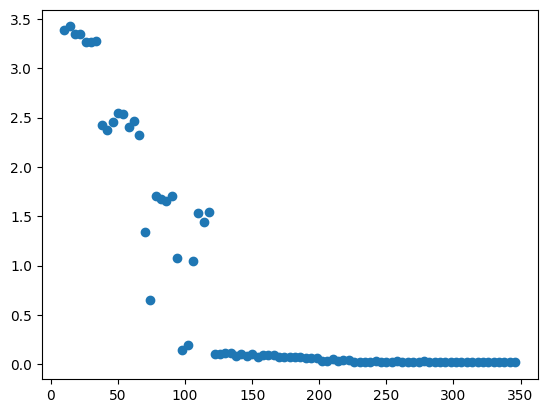

In [233]:
import matplotlib.pyplot as plt
plt.scatter(range(10,350,4), errors)

In [245]:
nmf_model = NMF(n_components = 306, max_iter = 200,verbose = 2)
W = nmf_model.fit_transform(model_pt)
H = nmf_model.n_components_
H = nmf_model.components_
mat = np.dot(W,H)
model_pt_train = pd.DataFrame(mat, columns = np.array(users_pt.columns))
model_pt_train.set_index(np.array(users_pt.index),inplace = True)
pred = model_pt_train.loc[user_id_hp].values
actual = users_pt.loc[user_id_hp]
mse = mean_squared_error(actual,pred)
mse

violation: 1.0
violation: 0.005818446634471308
violation: 0.04118861425453086
violation: 0.02430554047554733
violation: 0.03253867809165122
violation: 0.026072362057816188
violation: 0.02149877594898366
violation: 0.02195175356254616
violation: 0.02427831699586669
violation: 0.019429341647384295
violation: 0.011615720109719152
violation: 0.007753618726677219
violation: 0.0074596687936550445
violation: 0.006051849575916239
violation: 0.004332351905856491
violation: 0.0033313227087781784
violation: 0.0029813407610488067
violation: 0.0028475785878839394
violation: 0.0023271960257533167
violation: 0.0016828177170094018
violation: 0.0012273886309630319
violation: 0.0008732737972536222
violation: 0.0006632103672708342
violation: 0.0005260272415477397
violation: 0.00043169051357187517
violation: 0.0003659726802942657
violation: 0.00031898301981235543
violation: 0.0002807470436020524
violation: 0.00024973948155049725
violation: 0.00022169188243498664
violation: 0.00020052470403993187
violation

0.015989295844561508

In [247]:
model_pt_train.head(10)

,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
254,8.708204,0.048669,0.038611,0.051945,0.158681,0.001708,0.029570,0.154683,1.019127,0.271036,...,0.083152,0.188184,0.106255,0.292069,0.324570,0.101025,0.002125,1.432959,0.001781,0.099001
2276,0.287785,0.102400,3.670426,0.077343,0.238939,0.108903,0.069127,0.004080,0.244553,0.005485,...,0.169504,0.285083,1.149327,0.648723,0.188757,0.485226,0.002611,0.008130,0.026704,0.254400
2766,0.128243,0.013306,1.030430,0.007949,1.352040,0.040833,0.001368,0.020852,0.292733,0.001290,...,0.512318,0.379821,0.418381,0.175912,0.240976,1.089786,0.000578,0.134826,0.022060,0.585946
2977,0.101261,0.000250,0.359478,0.084108,0.189552,0.005658,0.202797,0.005627,0.301374,0.134579,...,0.178896,0.010310,0.002386,0.001837,0.131024,2.121236,0.000649,0.012530,0.266734,0.012883
3363,0.000862,0.000409,0.002420,0.000502,0.003853,0.213305,0.000298,0.000031,0.243421,0.170895,...,0.001109,0.001596,0.000356,0.001663,0.000484,0.126235,0.000290,0.001425,0.000101,0.000515
4017,0.000408,0.000502,0.004259,0.001691,0.053290,0.096157,0.001120,0.092305,0.102054,0.071396,...,0.001063,0.001226,0.000045,0.000128,0.052379,0.056045,0.000948,0.025745,0.059799,0.000854
4385,0.155244,0.007823,0.015452,0.001394,0.102628,0.012166,0.395415,0.001103,0.003088,0.003264,...,0.001667,0.035097,0.042591,0.206257,0.035281,0.002252,0.001349,0.004174,0.036696,0.022154
6251,0.002913,0.000414,0.137129,0.308405,0.723747,0.631630,0.022942,0.001540,0.506262,0.832136,...,0.054904,0.301009,0.156400,0.095803,0.631226,0.740986,0.001632,0.348720,0.442145,0.760592
6323,0.277366,0.222741,0.425218,0.008172,0.122024,0.298238,0.001405,0.022209,0.006532,0.007762,...,0.378328,0.135953,0.003512,0.206546,0.232883,0.126842,0.141472,0.203423,0.003001,0.530742
6543,0.180196,9.345350,1.165150,0.005588,0.014379,0.044846,0.016086,0.179087,0.112183,0.062955,...,0.002601,0.188481,0.010111,0.234605,0.587236,0.429586,0.107706,0.337130,0.043287,0.693583


In [248]:
users_pt.head(10)

Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
model_pt_train.loc[23902]

1984                                                                 0.000011
1st to Die: A Novel                                                  0.000000
2nd Chance                                                           0.000019
4 Blondes                                                            6.948602
A Bend in the Road                                                   0.062934
                                                                       ...   
Year of Wonders                                                      8.143837
You Belong To Me                                                     0.000048
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    0.157719
Zoya                                                                 0.071572
\O\" Is for Outlaw"                                                  0.006037
Name: 23902, Length: 706, dtype: float64

In [257]:
users_pt.loc[23902]

Title
1984                                                                 0.0
1st to Die: A Novel                                                  0.0
2nd Chance                                                           0.0
4 Blondes                                                            7.0
A Bend in the Road                                                   0.0
                                                                    ... 
Year of Wonders                                                      8.0
You Belong To Me                                                     0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    0.0
Zoya                                                                 0.0
\O\" Is for Outlaw"                                                  0.0
Name: 23902, Length: 706, dtype: float64

In [265]:
recomm_df = pd.DataFrame({
    "Title":model_pt_train.loc[235105].index,
    "Prediction" :model_pt_train.loc[235105],
    "Actual" : users_pt.loc[235105]
})

In [266]:
recomm_df[recomm_df["Actual"]!=0.0]

,Title,Prediction,Actual
A Wrinkle In Time,A Wrinkle In Time,9.708853,10.0
A Wrinkle in Time,A Wrinkle in Time,9.800153,10.0
Birthright,Birthright,5.838244,6.0
Bleachers,Bleachers,8.088245,8.0
Body of Lies,Body of Lies,5.754725,6.0
Daddy,Daddy,2.888634,3.0
Easy Prey,Easy Prey,7.686434,8.0
Executive Orders (Jack Ryan Novels),Executive Orders (Jack Ryan Novels),8.171551,8.0
Full House (Janet Evanovich's Full Series),Full House (Janet Evanovich's Full Series),3.718184,4.0
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel),Hard Eight : A Stephanie Plum Novel (A Stephan...,8.746284,9.0


In [267]:
user_sim_model_score = cosine_similarity(model_pt_train)
get_sim_books_model(235105,model_pt_train,user_sim_model_score )

[438 725  21 670 136]


,Recommended_title,Similarity_score(0-1),Weighted_score(1-10)


In [273]:
index = np.where(users_pt.index == 235105)[0][0]  
user_sim_scores = user_sim_score[index]
#print(index)
# Sort similar users based on similarity score and get the top similar users
similar_users = np.argsort(user_sim_score)[::-1][1:6]
print(similar_users)


[[  0 511 512 ... 740 275 808]
 [  0 480 481 ... 106 306 807]
 [404 493 494 ... 357 228 806]
 [809 372 371 ... 247 306 805]
 [  0 473 475 ... 435 680 804]]


In [74]:
import pickle
loaded_model = pickle.load(open("nmf_model.pkl","rb"))
W = loaded_model.transform(users_pt)



violation: 1.0
violation: 0.46556867516985484
violation: 0.1524456283294568
violation: 0.040332793387562495
violation: 0.011536683131367166
violation: 0.0032523938767523926
violation: 0.0009243294399965857
violation: 0.00023712461967681292
violation: 7.566540890249056e-05
Converged at iteration 10


array([[0.        , 0.03203743, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25233135, ..., 0.        , 0.        ,
        0.        ]])

In [75]:
W.shape

(810, 306)

In [77]:
H = loaded_model.components_
H


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46698601, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94280785, 2.11055538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
users_pt.index

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=810)